In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display # 사진넣기
import time # 수행시간
# from imblearn.over_sampling import SMOTE  # over_sampling
from sklearn.tree import export_graphviz  # 결정트리 모형
# import graphviz           # 결정트리 모형
from sklearn import tree # 결정트리 모형
# from sklearn.inspection import permutation_importance # feature 중요도

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #, plot_tree
from sklearn.ensemble import (VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier,
                                ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import xgboost as xgb # python wrapper
from xgboost import XGBClassifier  # sklearn wrapper
from lightgbm import LGBMClassifier

import pickle                  # 모델 저장
import matplotlib as mpl       # 한글깨짐
import matplotlib.font_manager as fm # 한글깨짐
import matplotlib.font_manager  # 한글깨짐


In [2]:
names = ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자']
df = pd.read_csv('./data/NHIS_total.csv', names=names)
df=df.drop(0)
print(df.head(5))
df.info()

   기준년도 가입자일련번호 성별코드 연령대코드(5세단위) 시도코드 신장(5Cm단위) 체중(5Kg단위) 허리둘레 시력(좌) 시력(우)  \
1  2009  279847    2          14   41       135        35   79   9.9   0.1   
2  2009   46535    2           1   26       145        40   62     1     1   
3  2009  180895    2           1   11       145        40   58     1   1.2   
4  2009   19658    2           1   11       145        40   67   1.2   1.2   
5  2009   18537    2           1   41       145        40   67   0.3   0.3   

     ...    감마지티피 흡연상태 음주여부 구강검진수검여부 치아우식증유무 결손치유무 치아마모증유무 제3대구치(사랑니)이상   치석  \
1    ...       13    1    0        0     NaN   NaN     NaN          NaN  NaN   
2    ...       11    1    0        0     NaN   NaN     NaN          NaN  NaN   
3    ...        7    1    0        1       1     0       0            0    0   
4    ...       12    1    0        1       1     0       0            0    0   
5    ...        7    1    1        1     NaN     0       0            0    0   

    데이터공개일자  
1  20151220  
2  20151220  
3  20151

### 데이터타입 변경필요(범주형 int32, 수치형 float64)

In [3]:
# category_features = ['기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '청력(좌)','청력(우)', '요단백', 
#                      '흡연상태', '음주여부', '구강검진수검여부']
# for feature in category_features:
#     df[feature] = pd.to_numeric(df[feature])

In [4]:
#### for문 리눅스 서버 memory error 개별로 처리

In [5]:
feature = '기준년도'
df[feature] = pd.to_numeric(df[feature])

In [6]:
feature = '성별코드'
df[feature] = pd.to_numeric(df[feature])

In [7]:
feature = '연령대코드(5세단위)'
df[feature] = pd.to_numeric(df[feature])

In [8]:
feature = '시도코드'
df[feature] = pd.to_numeric(df[feature])

In [9]:
feature =  '청력(좌)'
df[feature] = pd.to_numeric(df[feature])

In [10]:
feature =  '청력(우)'
df[feature] = pd.to_numeric(df[feature])

In [11]:
feature =  '요단백'
df[feature] = pd.to_numeric(df[feature])

In [12]:
feature =  '흡연상태'
df[feature] = pd.to_numeric(df[feature])

In [13]:
feature =  '음주여부'
df[feature] = pd.to_numeric(df[feature])

In [14]:
feature =  '구강검진수검여부'
df[feature] = pd.to_numeric(df[feature])

In [15]:
# numberic_features = ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레','시력(좌)', '시력(우)', 
#                      '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', 
#                      '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤', '혈색소', '혈청크레아티닌',
#                        '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']
# for feature in numberic_features:
#     df[feature] = pd.to_numeric(df[feature])
# # df.info()

In [16]:
feature =  '신장(5Cm단위)'
df[feature] = pd.to_numeric(df[feature])

In [17]:
feature =  '체중(5Kg단위)'
df[feature] = pd.to_numeric(df[feature])

In [18]:
feature =  '허리둘레'
df[feature] = pd.to_numeric(df[feature])

In [19]:
feature =  '시력(좌)'
df[feature] = pd.to_numeric(df[feature])

In [20]:
feature =  '시력(우)'
df[feature] = pd.to_numeric(df[feature])

In [21]:
feature =  '수축기혈압'
df[feature] = pd.to_numeric(df[feature])

In [22]:
feature =  '이완기혈압'
df[feature] = pd.to_numeric(df[feature])

In [23]:
feature =  '식전혈당(공복혈당)'
df[feature] = pd.to_numeric(df[feature])

In [24]:
feature = '총콜레스테롤' 
df[feature] = pd.to_numeric(df[feature])

In [25]:
feature = '트리글리세라이드'
df[feature] = pd.to_numeric(df[feature])

In [26]:
feature = 'HDL콜레스테롤'
df[feature] = pd.to_numeric(df[feature])

In [27]:
feature =  'LDL콜레스테롤'
df[feature] = pd.to_numeric(df[feature])

In [28]:
feature =  '혈색소'
df[feature] = pd.to_numeric(df[feature])

In [29]:
feature =  '혈청크레아티닌'
df[feature] = pd.to_numeric(df[feature])

In [30]:
feature =   '(혈청지오티)AST'
df[feature] = pd.to_numeric(df[feature])

In [31]:
feature =   '(혈청지오티)ALT'
df[feature] = pd.to_numeric(df[feature])

In [32]:
feature =  '감마지티피'
df[feature] = pd.to_numeric(df[feature])

### target feature  static

In [33]:
df['target'] = df['식전혈당(공복혈당)'].map(lambda x:  1 if x >= 126 else 0)

tmp_lst=df['target'].value_counts().values
print(f'정상(target) {np.round((tmp_lst[0]/tmp_lst.sum())*100, 2)}%')
print(f'당뇨(target) {np.round((tmp_lst[1]/tmp_lst.sum())*100, 2)}%')

정상(target) 60.89%
당뇨(target) 39.11%


In [34]:
df_year = df.groupby(['기준년도','target'])['target'].count()
df_year = df_year.reset_index(name="target_count")
df_year = df_year.set_index('기준년도')
df_year.drop_duplicates(keep ='first')

,target,target_count
기준년도,,
2002,0,16024
2002,1,983976
2003,0,15256
2003,1,984744
2004,0,16088
2004,1,983912
2005,0,15338
2005,1,984662
2006,0,14610


In [35]:
# linux 
font_dirs = ['/home/sch/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name][:3]

['NanumMyeongjo Eco', 'NanumMyeongjo', 'NanumGothicCoding']

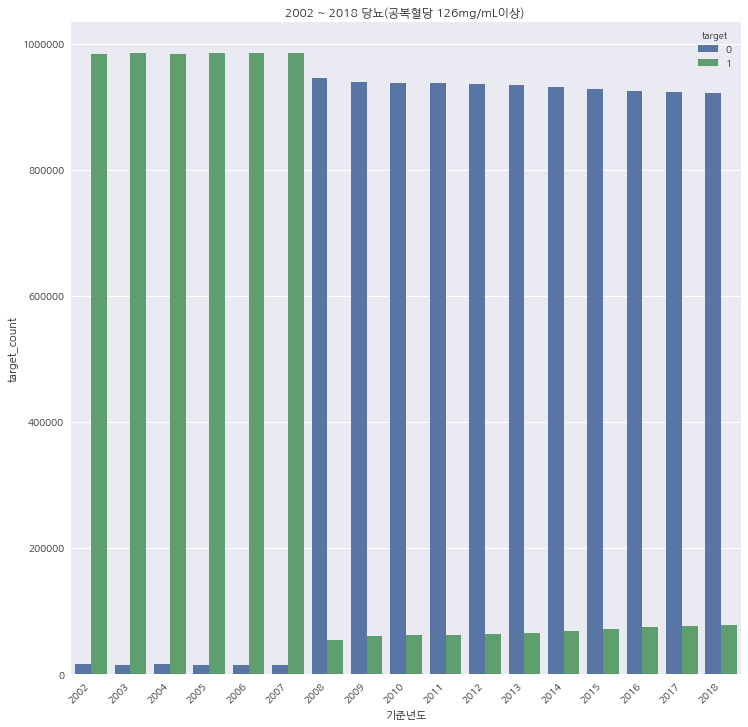

In [36]:
# temp_dict={'target_count': (10000,1000000)}
def Plot(df):
    plt.figure(figsize=(12,12))
#     fig, ax =plt.figure(figsize=(8,4))
    sns.set(font_scale=1.0)

#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

       # 한글깨짐 리눅스
    mpl.rcParams['font.family'] = 'NanumGothic'
    mpl.rc('axes', unicode_minus=False)
    ax = sns.barplot(x=df_year.index, y=df_year['target_count'], data=df, hue='target')
#         start, end = tup
#         ax.set_ylim(start, end)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
    plt.title(f'2002 ~ 2018 당뇨(공복혈당 126mg/mL이상) ')
    plt.savefig(f"./img/visual/2002_2018_diabete_static.png",dpi=200, bbox_inches='tight')
    plt.show()
#     plt.close()
Plot(df_year)

## null, zero 0 value count (by year)
* 800만 ~ 1300만 feature '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석' 제외

In [37]:
df.isnull().sum()

기준년도                   0
가입자일련번호                0
성별코드                   0
연령대코드(5세단위)            0
시도코드                   0
신장(5Cm단위)            897
체중(5Kg단위)            897
허리둘레               39278
시력(좌)              40328
시력(우)              39830
청력(좌)              39674
청력(우)               1850
수축기혈압               5837
이완기혈압               5837
식전혈당(공복혈당)          6005
총콜레스테롤            667330
트리글리세라이드          686435
HDL콜레스테롤          671071
LDL콜레스테롤          723315
혈색소                 6024
요단백               239083
혈청크레아티닌           239786
(혈청지오티)AST         84119
(혈청지오티)ALT       3860384
감마지티피            4159968
흡연상태             4179519
음주여부             7742088
구강검진수검여부         4476852
치아우식증유무          8746468
결손치유무           13345833
치아마모증유무         13109677
제3대구치(사랑니)이상    15338068
치석              13907413
데이터공개일자          9000000
target                 0
dtype: int64

### null static by year

In [38]:
df_null = df.groupby('기준년도').apply(lambda x: x.isnull().sum())

In [39]:
cat_lst=['신장(5Cm단위)','체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압','이완기혈압',  
         '식전혈당(공복혈당)', '혈색소','(혈청지오티)AST','총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',  
         '요단백','혈청크레아티닌','(혈청지오티)ALT', '감마지티피', '흡연상태']

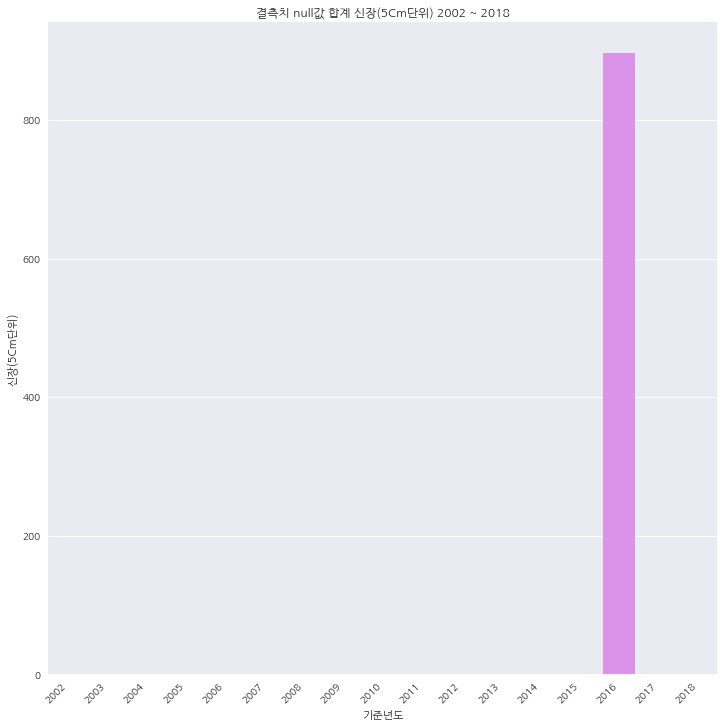

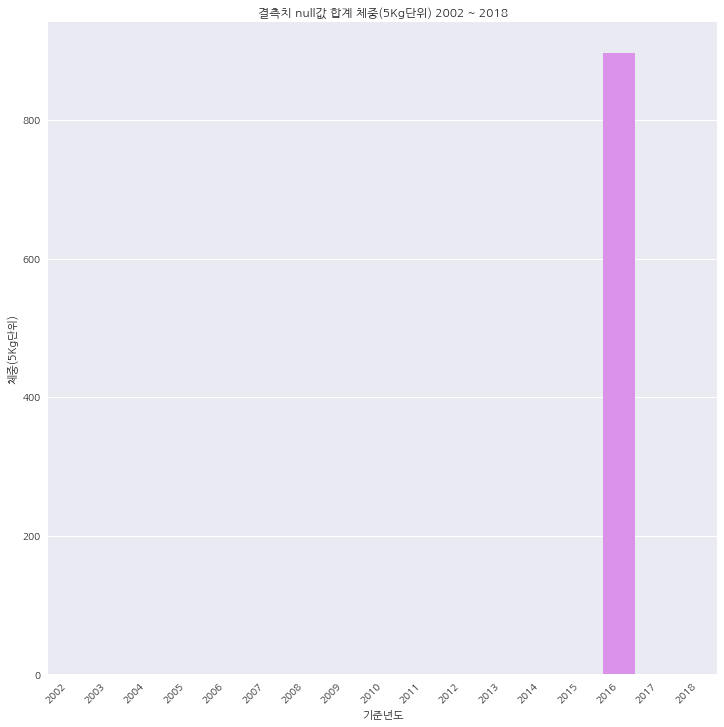

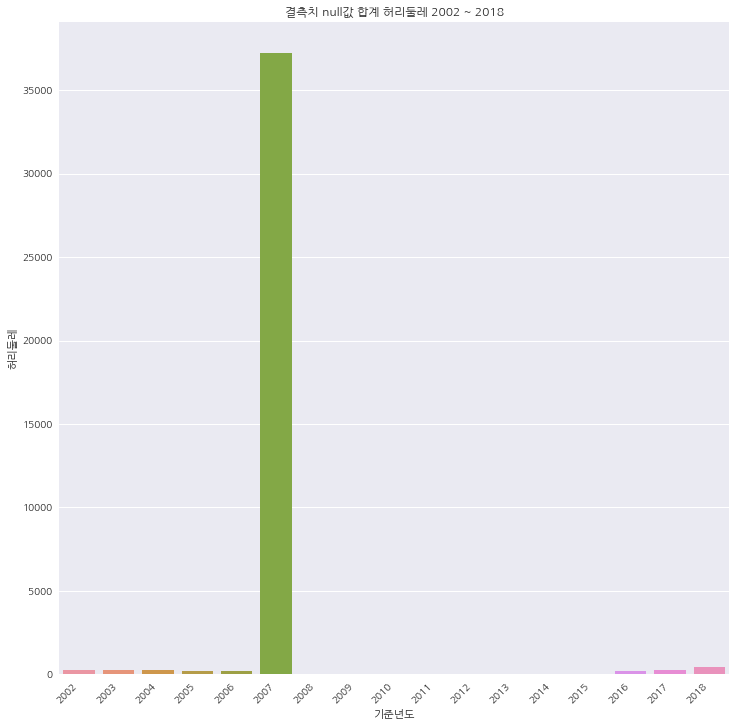

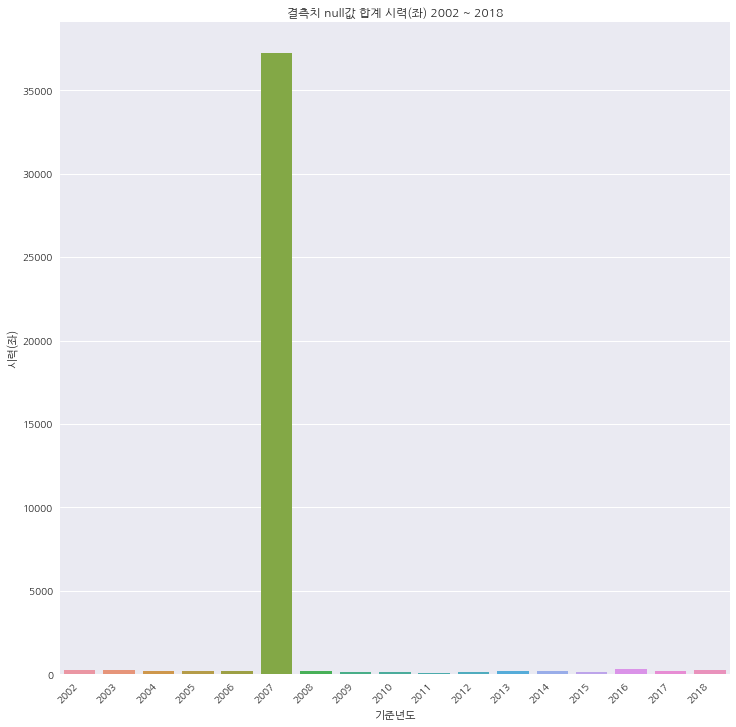

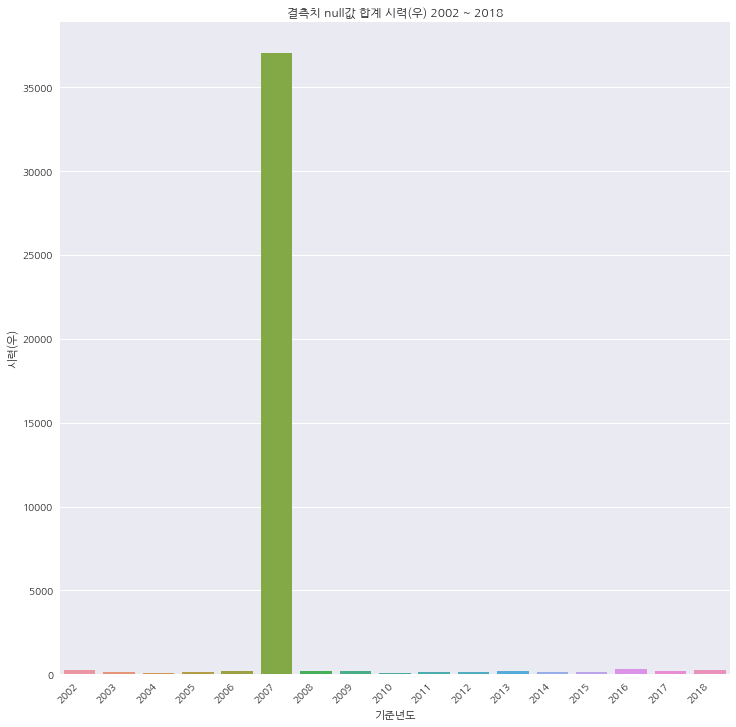

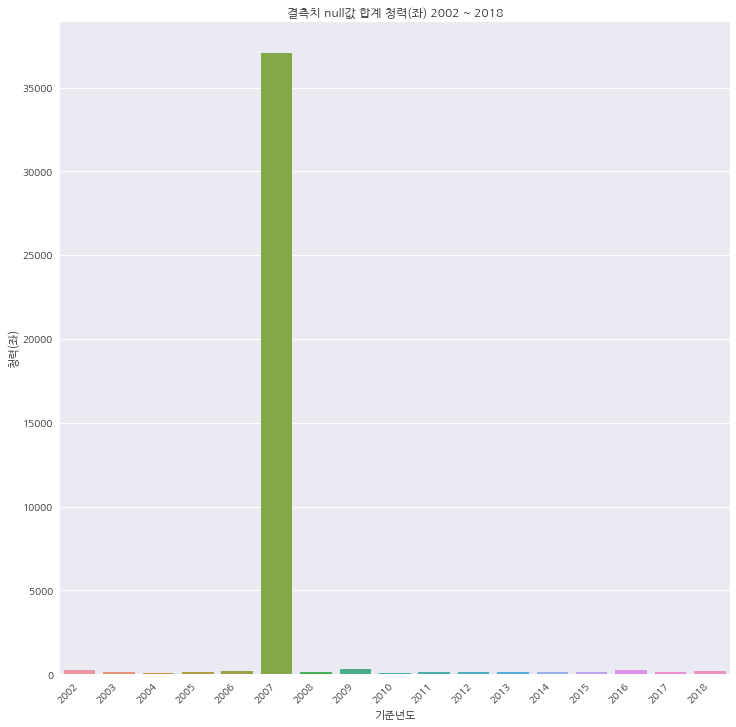

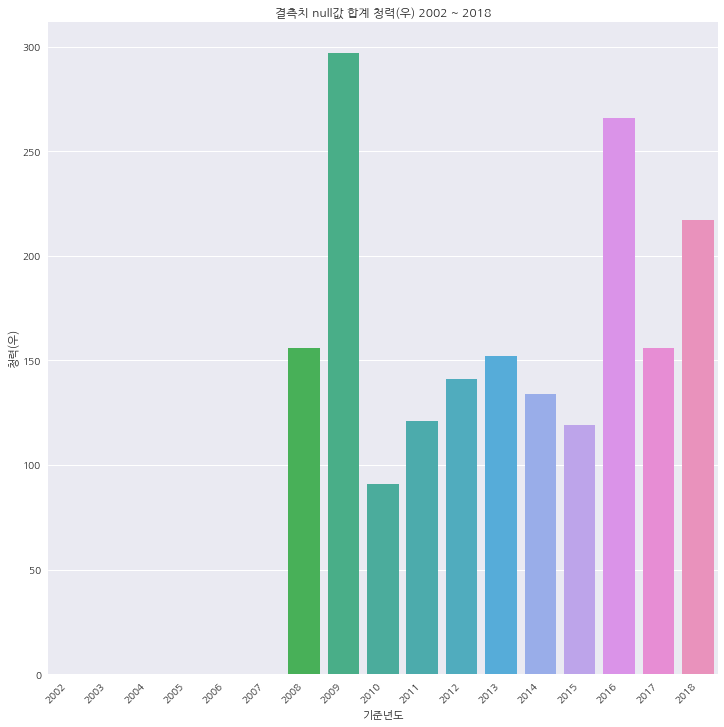

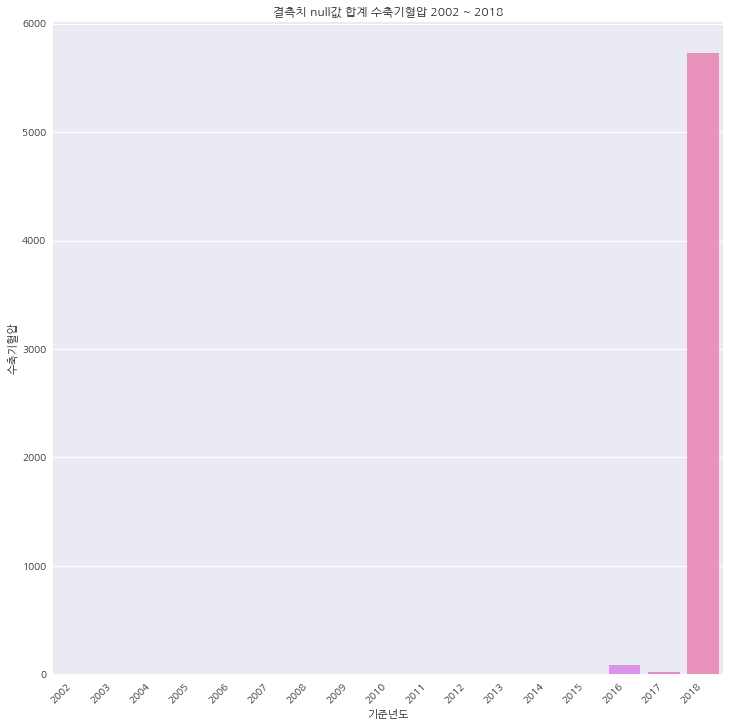

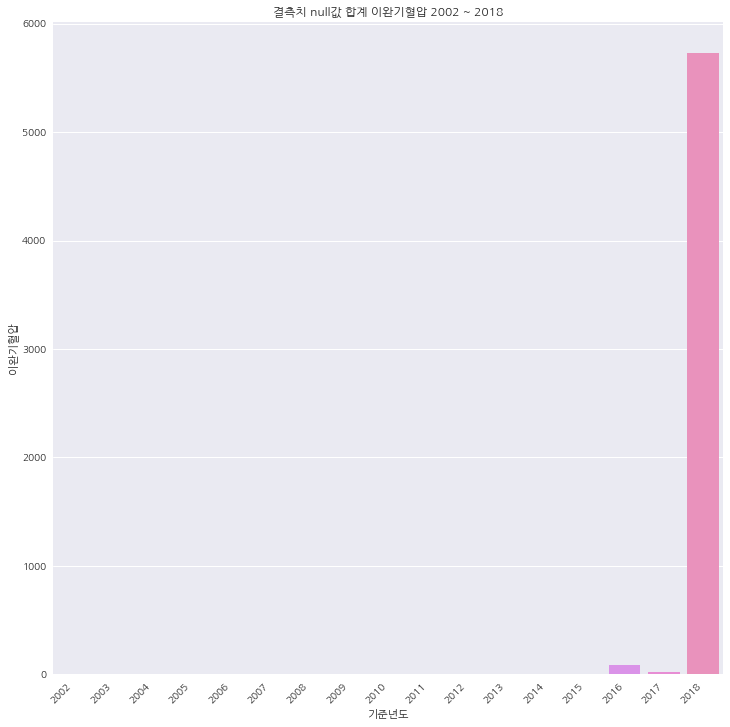

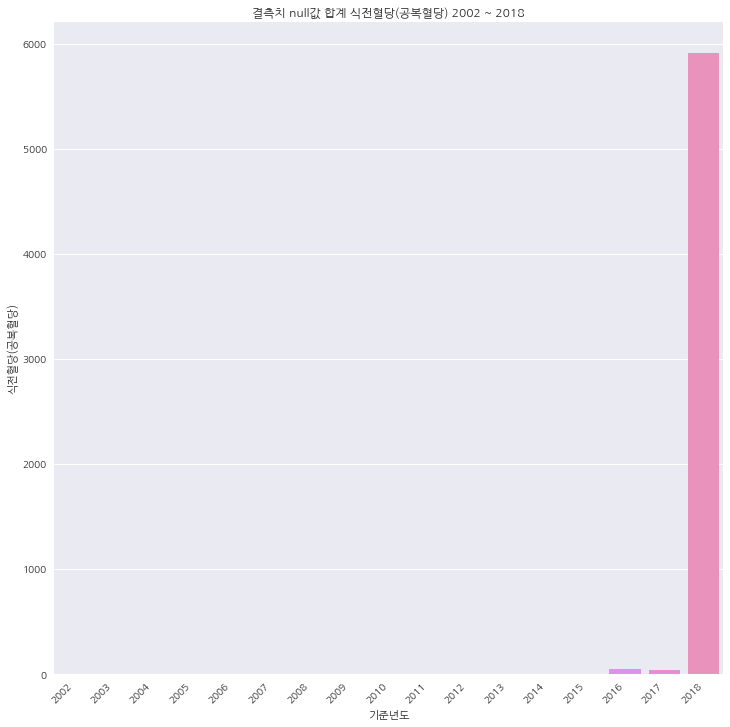

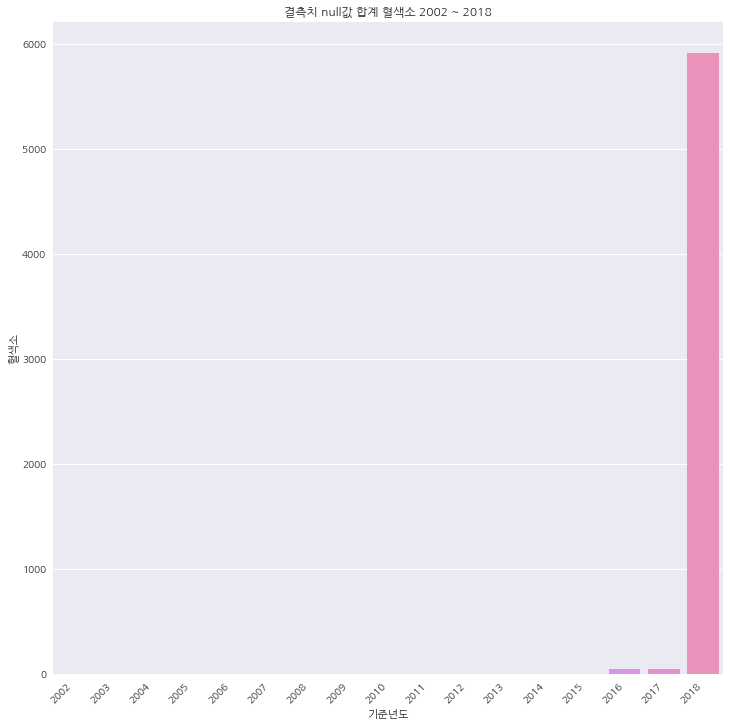

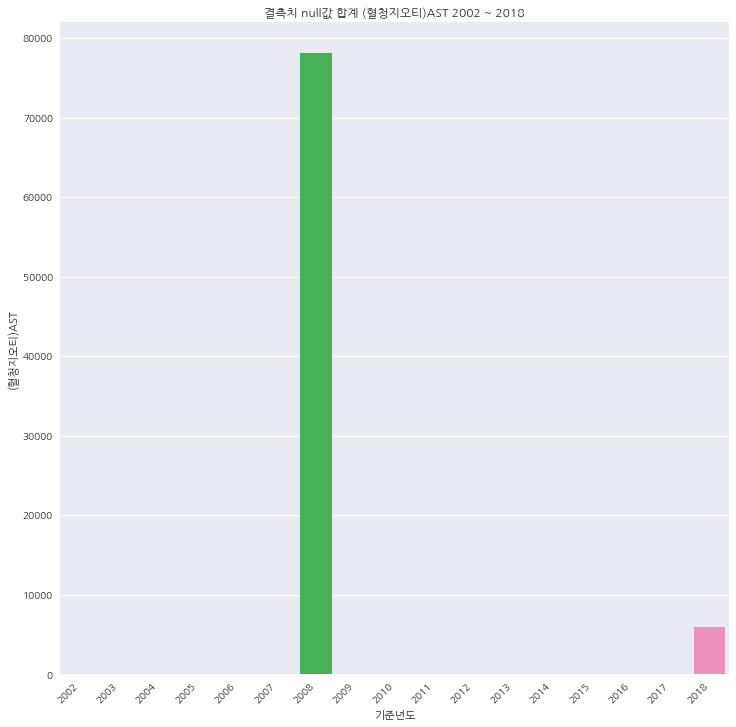

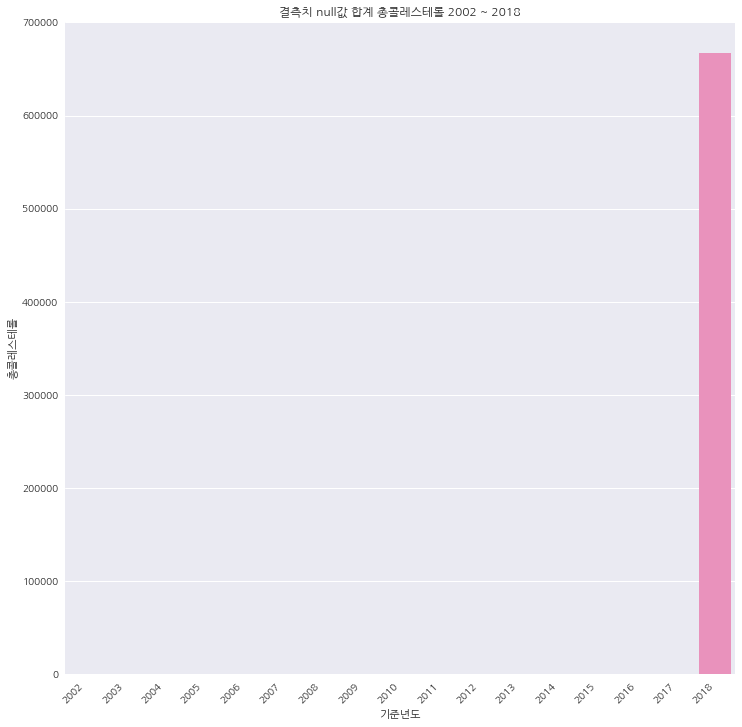

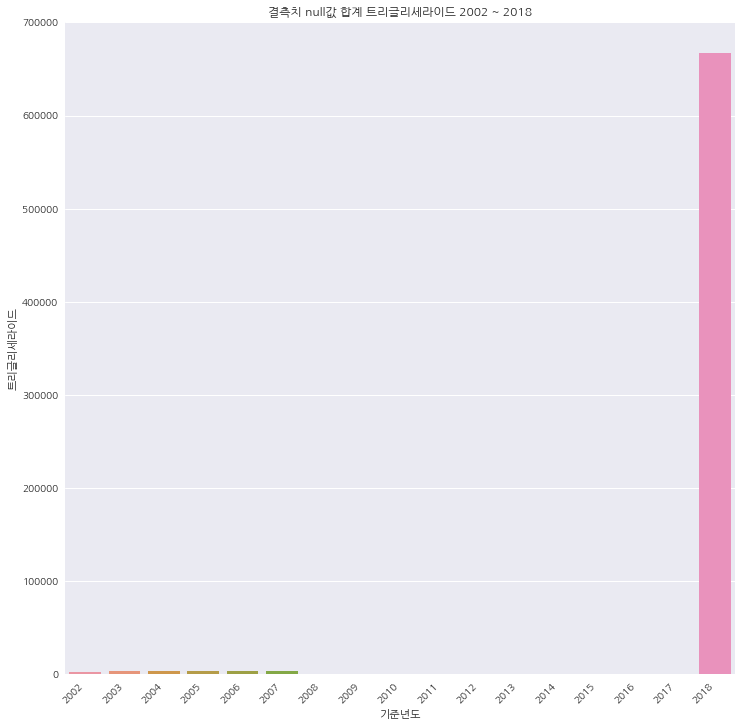

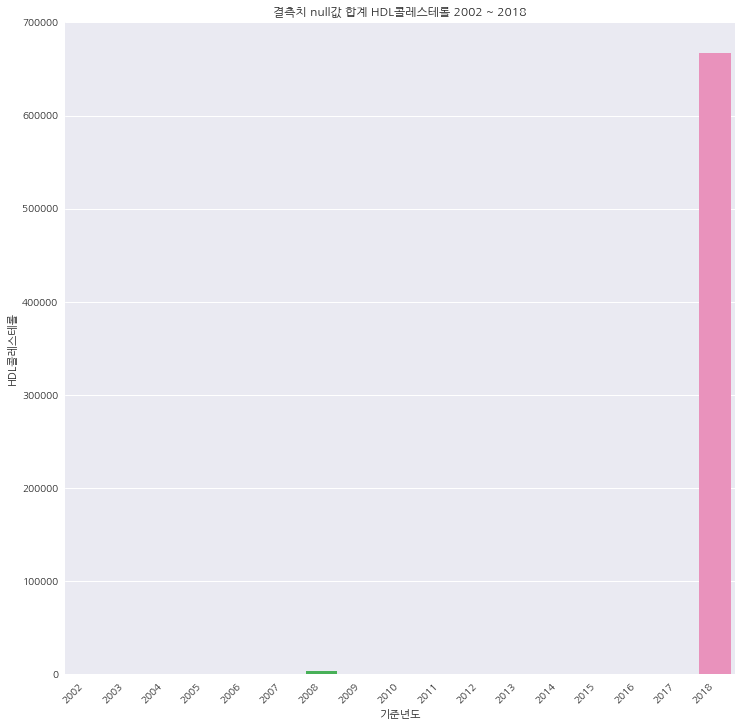

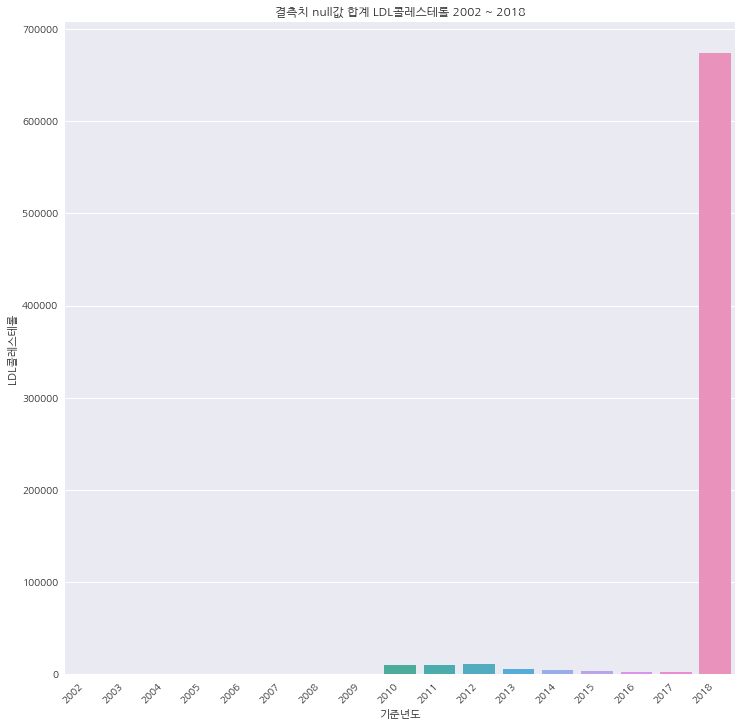

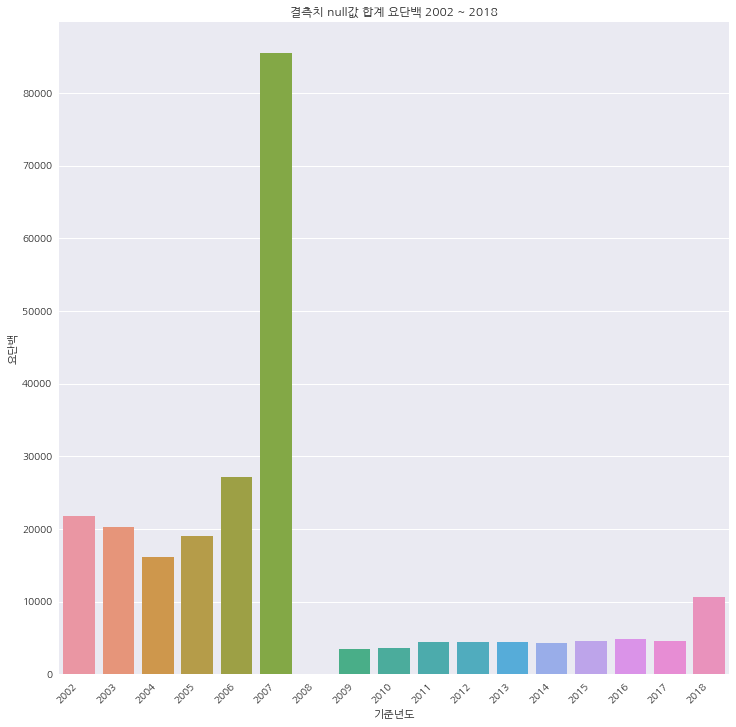

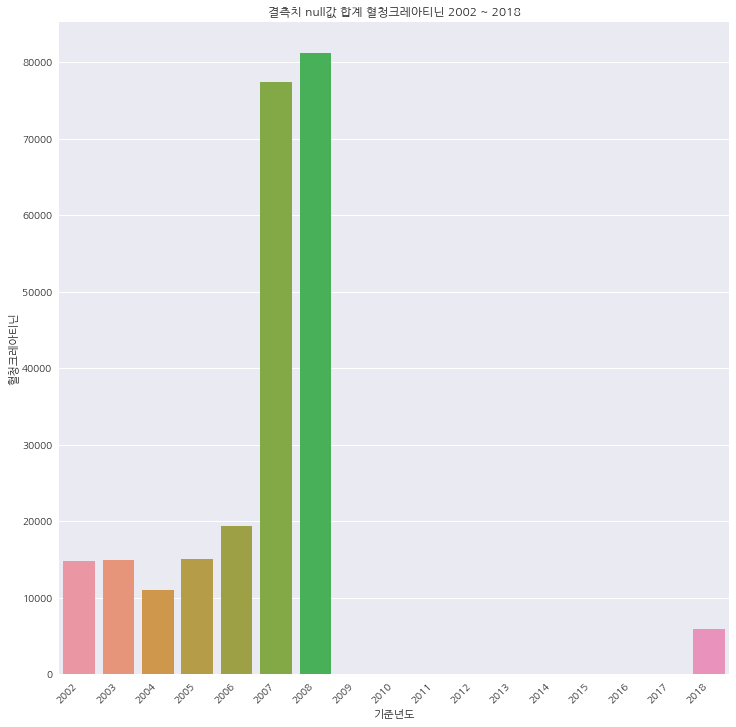

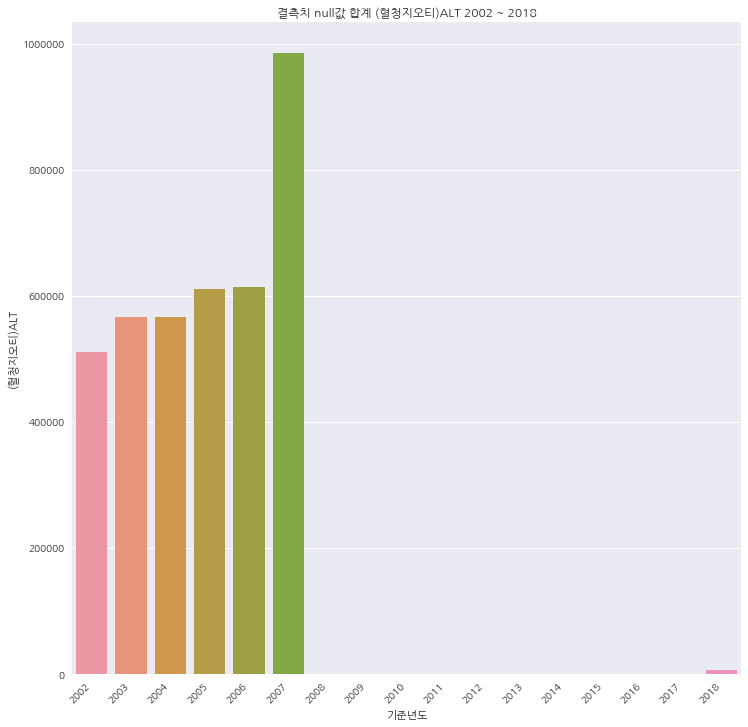

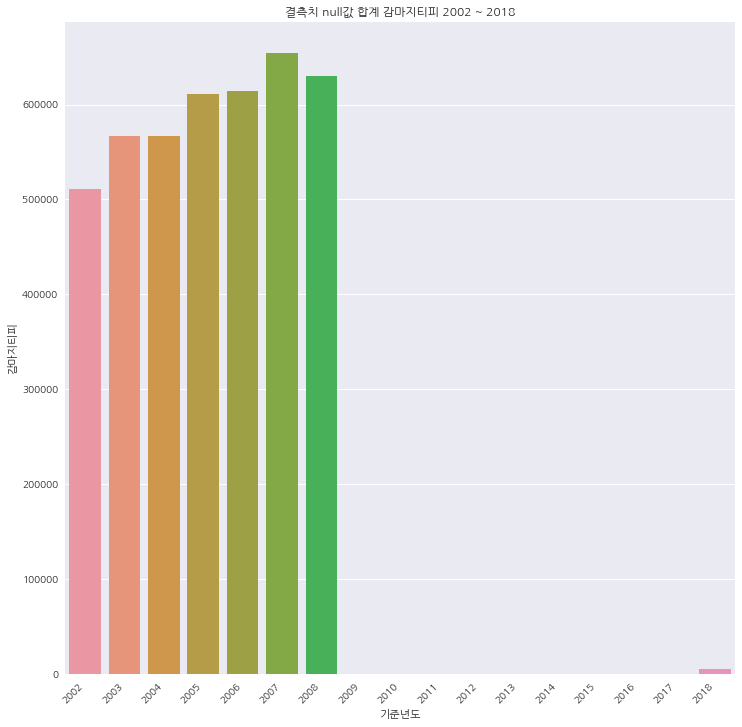

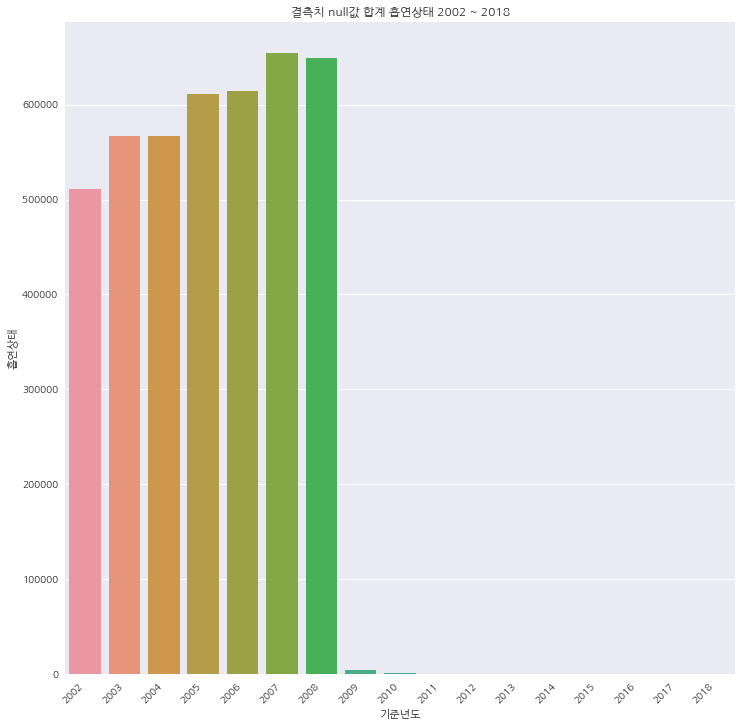

In [40]:
def Plot(df):
    for column in cat_lst:
        plt.figure(figsize=(12,12))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)
        ax = sns.barplot(x=df.index, y=column, data=df)

#         ax.set_ylim(500, 50000)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        plt.title(f'결측치 null값 합계 {column} 2002 ~ 2018')
        plt.savefig(f"./img/visualNull/2002_2018_null_{column}_count.png",dpi=200, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_null)

#### zero 0 value

In [41]:
(df == 0).sum()

기준년도                   0
가입자일련번호                0
성별코드                   0
연령대코드(5세단위)            0
시도코드                   0
신장(5Cm단위)              0
체중(5Kg단위)              0
허리둘레                   0
시력(좌)                  0
시력(우)                  0
청력(좌)                  0
청력(우)                  0
수축기혈압                  0
이완기혈압                  0
식전혈당(공복혈당)             0
총콜레스테롤                 0
트리글리세라이드               0
HDL콜레스테롤               2
LDL콜레스테롤            1767
혈색소                    0
요단백                    0
혈청크레아티닌          2851022
(혈청지오티)AST       3963387
(혈청지오티)ALT       2259082
감마지티피            2322308
흡연상태             2500787
음주여부             4519596
구강검진수검여부         7510792
치아우식증유무          1536550
결손치유무            1883876
치아마모증유무          1562819
제3대구치(사랑니)이상     1452488
치석               1415953
데이터공개일자                0
target          10351891
dtype: int64

In [42]:
df_0 = df.groupby('기준년도').apply(lambda x: (x ==0).sum())
df_0

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,target
기준년도,,,,,,,,,,,,,,,,,,,,,
2002,0,0,0,0,0,0,0,0,0,0,...,436220,37088,272531,0,0,0,0,0,0,16024
2003,0,0,0,0,0,0,0,0,0,0,...,391023,32704,243198,0,0,0,0,0,0,15256
2004,0,0,0,0,0,0,0,0,0,0,...,391648,25292,245051,0,0,0,0,0,0,16088
2005,0,0,0,0,0,0,0,0,0,0,...,348625,21679,218663,0,0,0,0,0,0,15338
2006,0,0,0,0,0,0,0,0,0,0,...,341655,17353,219781,0,0,0,0,0,0,14610
2007,0,0,0,0,0,0,0,0,0,0,...,305168,17750,192743,0,0,0,0,0,0,15237
2008,0,0,0,0,0,0,0,0,0,0,...,286448,307168,20583,190867,0,0,0,0,0,945340
2009,0,0,0,0,0,0,0,0,0,0,...,0,507974,619583,107449,298886,312249,265466,178214,0,939382
2010,0,0,0,0,0,0,0,0,0,0,...,0,516097,625396,64383,304520,313998,256155,175161,0,938468


In [43]:
cat_lst2 = ['혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태' ]

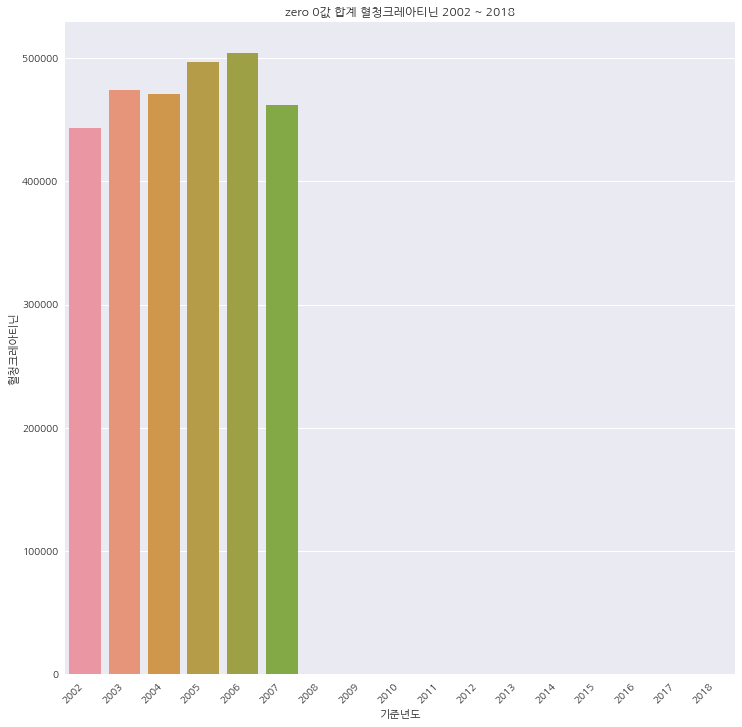

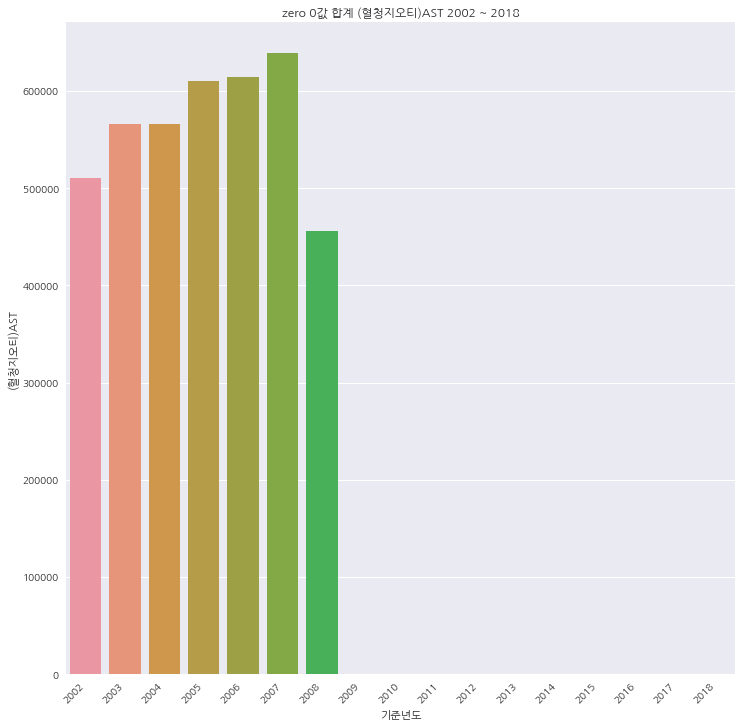

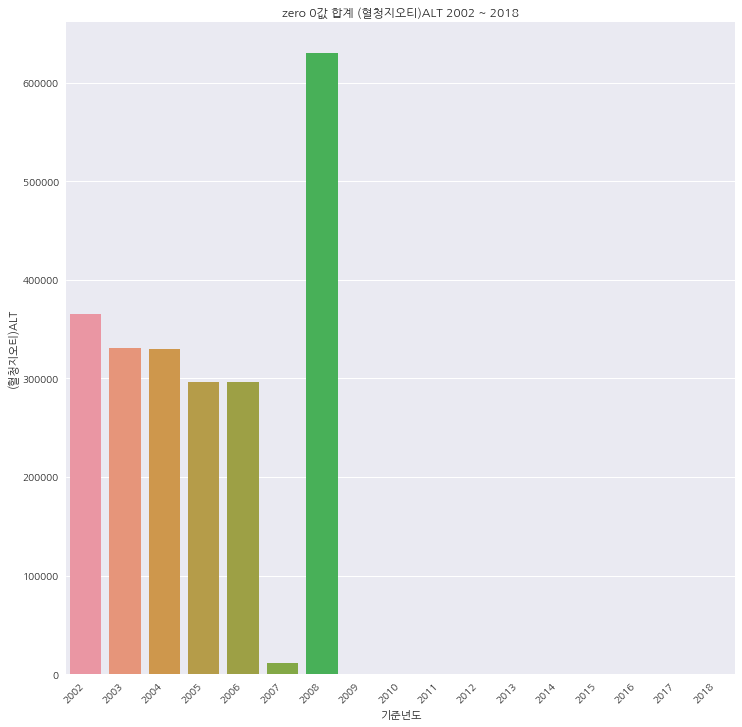

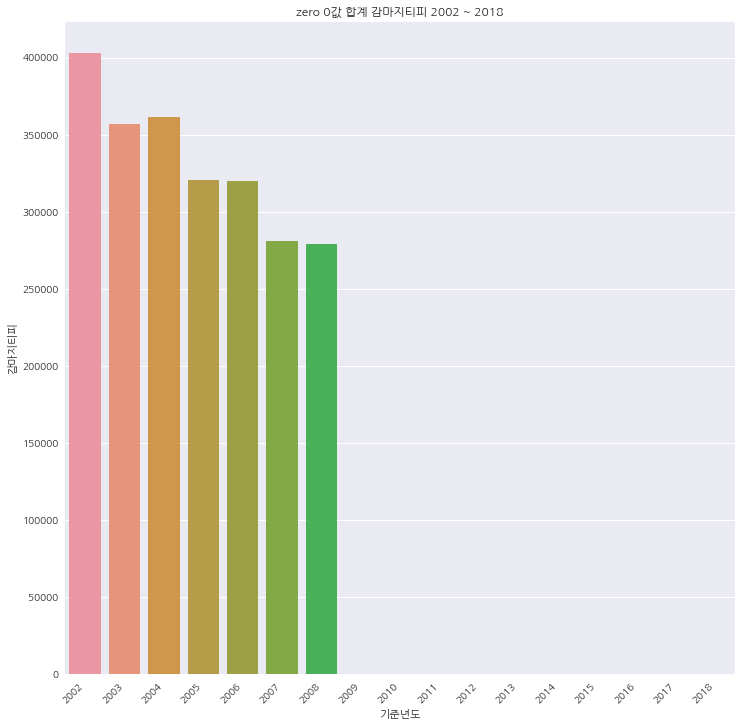

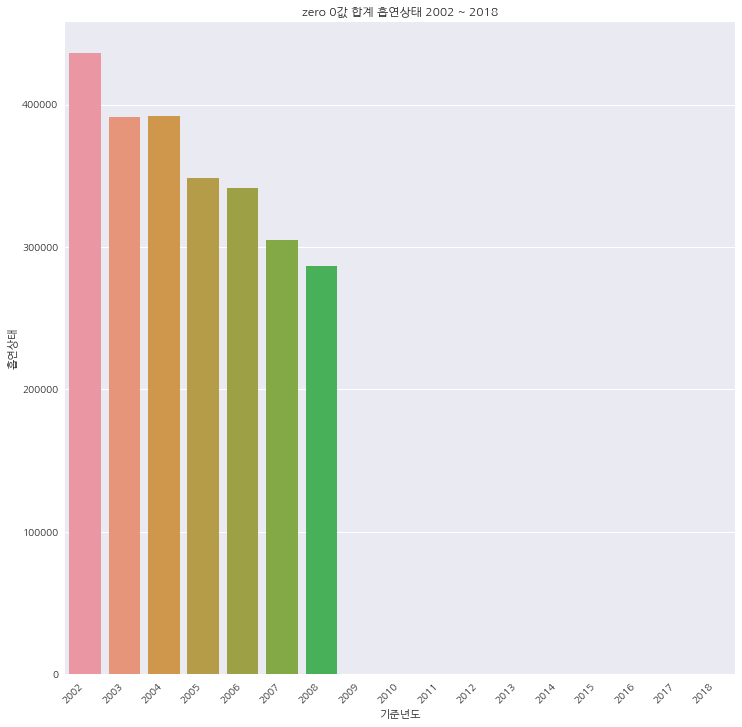

In [44]:
def Plot(df):
    for column in cat_lst2:
        plt.figure(figsize=(12,12))
    #     fig, ax =plt.figure(figsize=(8,4))
        sns.set(font_scale=1.0)
        
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf

           # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)
        ax = sns.barplot(x=df.index, y=column, data=df)

#         ax.set_ylim(2000000, 5000000)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right') 
        plt.title(f'zero 0값 합계 {column} 2002 ~ 2018')
        plt.savefig(f"./img/visualNull/2002_2018_zero_{column}__count.png",dpi=200, bbox_inches='tight')
        plt.show()
    #     plt.close()
Plot(df_0)

### null zero 값 통계관련
* 2002 ~ 2008년자료는 null, 0값이 너무 많음 ==> 삭제
* 2009 ~ 2018년 자료중 
    + 2018년 100만건중 '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤' 항목은 66만건이 null값
        - '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤' 항목 33만건 살려서 모델가능
        -  2018년도는 시각용(visual)용으로 다른 2009 ~ 2017년도와 맞지 않음 visual용으로는 2018년도 삭제
* 참고로 전체 2002 ~ 2018년도 데이터에 대해
    + 수치형 feature중 null, zero값을 모두 없애면 (해 보았는데, 2009 ~ 2018 남고, 2002 ~ 2008자료는 없어짐)

### 2002 ~ 2008 remove (diabete data not stable)

In [45]:
df=df[ df['기준년도']  != 2002  ]

In [46]:
df=df[ df['기준년도']  != 2003  ]

In [47]:
df=df[ df['기준년도']  != 2004  ]

In [48]:
df=df[ df['기준년도']  != 2005  ]

In [49]:
df=df[ df['기준년도']  != 2006  ]

In [50]:
df=df[ df['기준년도']  != 2007  ]

In [51]:
df=df[ df['기준년도']  != 2008  ]

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000000 entries, 1 to 15000000
Data columns (total 35 columns):
기준년도            int64
가입자일련번호         object
성별코드            int64
연령대코드(5세단위)     int64
시도코드            int64
신장(5Cm단위)       float64
체중(5Kg단위)       float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진수검여부        float64
치아우식증유무         object
결손치유무           object
치아마모증유무         object
제3대구치(사랑니)이상    object
치석              object
데이터공개일자         object
target          int64
dtypes: float64(23), int64(5), object(7)
memory usage: 2.7+ GB

### 결측값, 0값 확인

In [53]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           897
체중(5Kg단위)           897
허리둘레                873
시력(좌)              1722
시력(우)              1782
청력(좌)              1685
청력(우)              1694
수축기혈압              5837
이완기혈압              5837
식전혈당(공복혈당)         6005
총콜레스테롤           667330
트리글리세라이드         667341
HDL콜레스테롤         667345
LDL콜레스테롤         723240
혈색소                6019
요단백               49198
혈청크레아티닌            5994
(혈청지오티)AST         5989
(혈청지오티)ALT         5991
감마지티피              5994
흡연상태               6562
음주여부            1369995
구강검진수검여부              0
치아우식증유무         8097453
결손치유무           7345833
치아마모증유무         6109677
제3대구치(사랑니)이상    8338068
치석              6907413
데이터공개일자         2000000
target                0
dtype: int64

In [54]:
(df == 0).sum(axis=0)

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                  0
시력(좌)                 0
시력(우)                 0
청력(좌)                 0
청력(우)                 0
수축기혈압                 0
이완기혈압                 0
식전혈당(공복혈당)            0
총콜레스테롤                0
트리글리세라이드              0
HDL콜레스테롤              0
LDL콜레스테롤           1765
혈색소                   0
요단백                   0
혈청크레아티닌               0
(혈청지오티)AST            0
(혈청지오티)ALT            0
감마지티피                 0
흡연상태                  0
음주여부            4060562
구강검진수검여부        6098242
치아우식증유무         1345683
결손치유무           1883876
치아마모증유무         1562819
제3대구치(사랑니)이상    1452488
치석              1415953
데이터공개일자               0
target          9313998
dtype: int64

In [55]:
(df == np.nan).sum(axis=0)

기준년도            0
가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg단위)       0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진수검여부        0
치아우식증유무         0
결손치유무           0
치아마모증유무         0
제3대구치(사랑니)이상    0
치석              0
데이터공개일자         0
target          0
dtype: int64

### diabete static

In [56]:
tmp_lst=df['target'].value_counts().values
print(f'정상(target) {np.round((tmp_lst[0]/tmp_lst.sum())*100, 2)}%')
print(f'당뇨(target) {np.round((tmp_lst[1]/tmp_lst.sum())*100, 2)}%')

정상(target) 93.14%
당뇨(target) 6.86%


### 결측치, 0 값이 다수라서 데이터로 가치가 없는 feature 삭제

In [57]:
df.drop(['가입자일련번호','결손치유무', '치아우식증유무', '치아마모증유무', '제3대구치(사랑니)이상','데이터공개일자'], axis=1, inplace=True)

#### 치석  결측치 많아 추가삭제  

In [58]:
df.drop(['치석'], axis=1, inplace=True)

###  1 결측치, 0값처리 

####  1-1 범주형 자료 결즉치 0값 처리

In [59]:
#  청력은 1 , 2값이 존재하므로 정상1로(99%) 처리
df['청력(좌)'].fillna(1, inplace=True)
df['청력(우)'].fillna(1, inplace=True)

#  요단백은 1 ~ 6값이므로 그대로 null remove
df = df[df['요단백'].notnull()]

#  흡연상태는 1 2,3값이 존재하므로 1로 대체
df['흡연상태'].fillna(1, inplace=True)

# 음주여부는 0값이 존재하므로 0으로 대체
df['음주여부'].fillna(0, inplace=True)

#  구강검진수검여부 0값이 존재하므로 그대로
df['구강검진수검여부'].fillna(0, inplace=True)

df[['청력(좌)', '청력(우)', '요단백', '흡연상태', '음주여부', '구강검진수검여부' ]].isnull().sum()

청력(좌)       0
청력(우)       0
요단백         0
흡연상태        0
음주여부        0
구강검진수검여부    0
dtype: int64

In [60]:
(df[['청력(좌)', '청력(우)', '요단백', '흡연상태', '음주여부', '구강검진수검여부' ]] == 0).sum()

청력(좌)             0
청력(우)             0
요단백               0
흡연상태              0
음주여부        5399047
구강검진수검여부    6061691
dtype: int64

#### 1-2 수치형자료 결측치 : row 제거(데이터가 대용량이 null data small compare by data)

In [61]:
# numberic_features = ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레','시력(좌)', '시력(우)', 
#                      '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', 
#                      '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤', '혈색소', '혈청크레아티닌',
#                        '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']
# for feature in numberic_features:
#     df = df[df[feature].notnull]

In [62]:
df=df[df['신장(5Cm단위)'].notnull()]

In [63]:
df=df[df['체중(5Kg단위)'].notnull()]

In [64]:
df=df[df['허리둘레'].notnull()]

In [65]:
df=df[df['시력(좌)'].notnull()]

In [66]:
df=df[df['시력(우)'].notnull()]

In [67]:
df=df[df['수축기혈압'].notnull()]

In [68]:
df=df[df['이완기혈압'].notnull()]

In [69]:
df=df[df['식전혈당(공복혈당)'].notnull()]

In [70]:
df=df[df['총콜레스테롤'].notnull()]

In [71]:
df=df[df['트리글리세라이드'].notnull()]

In [72]:
df=df[df['HDL콜레스테롤'].notnull()]

In [73]:
df=df[df['LDL콜레스테롤'].notnull()]

In [74]:
df=df[df['혈색소'].notnull()]

In [75]:
df=df[df['혈청크레아티닌'].notnull()]

In [76]:
df=df[df['(혈청지오티)AST'].notnull()]

In [77]:
df=df[df['(혈청지오티)ALT'].notnull()]

In [78]:
df=df[df['감마지티피'].notnull()]

In [79]:
df.isnull().sum()

기준년도           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
target         0
dtype: int64

In [80]:
z=(df == 0).sum(axis=0)
z

기준년도                 0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레                 0
시력(좌)                0
시력(우)                0
청력(좌)                0
청력(우)                0
수축기혈압                0
이완기혈압                0
식전혈당(공복혈당)           0
총콜레스테롤               0
트리글리세라이드             0
HDL콜레스테롤             0
LDL콜레스테롤          1762
혈색소                  0
요단백                  0
혈청크레아티닌              0
(혈청지오티)AST           0
(혈청지오티)ALT           0
감마지티피                0
흡연상태                 0
음주여부           5156702
구강검진수검여부       5640859
target         8610329
dtype: int64

In [81]:
z=(df == np.nan).sum(axis=0)
z

기준년도           0
성별코드           0
연령대코드(5세단위)    0
시도코드           0
신장(5Cm단위)      0
체중(5Kg단위)      0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
target         0
dtype: int64

#### 1-3 numberic  0 value

In [82]:
zero_numberic_features = ['HDL콜레스테롤','LDL콜레스테롤', '혈청크레아티닌','(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']
for feature in zero_numberic_features:
    df = df[ df[feature] != 0 ]

In [83]:
(df == 0).sum(axis=0)

기준년도                 0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)            0
체중(5Kg단위)            0
허리둘레                 0
시력(좌)                0
시력(우)                0
청력(좌)                0
청력(우)                0
수축기혈압                0
이완기혈압                0
식전혈당(공복혈당)           0
총콜레스테롤               0
트리글리세라이드             0
HDL콜레스테롤             0
LDL콜레스테롤             0
혈색소                  0
요단백                  0
혈청크레아티닌              0
(혈청지오티)AST           0
(혈청지오티)ALT           0
감마지티피                0
흡연상태                 0
음주여부           5156208
구강검진수검여부       5639819
target         8608892
dtype: int64

In [84]:
#### pandas profiling  # 대량일경우에는 시간이 너무 많이 소모됨

In [85]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# # As a file
# profile.to_file("./report/nhis131_report.html")
# # profile

In [86]:
# df.to_csv('./data/NHIS_1700.csv', sep=',', encoding='utf-8', index=False)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232220 entries, 1 to 15000000
Data columns (total 28 columns):
기준년도           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
신장(5Cm단위)      float64
체중(5Kg단위)      float64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부       float64
target         int64
dtypes: float64(23), int64(5)
memory usage: 2.0 GB


In [ ]:
## df copy
# df_1 = df.copy()

#### 수치형 features 이상치 제거전 boxplot 이상치 확인 

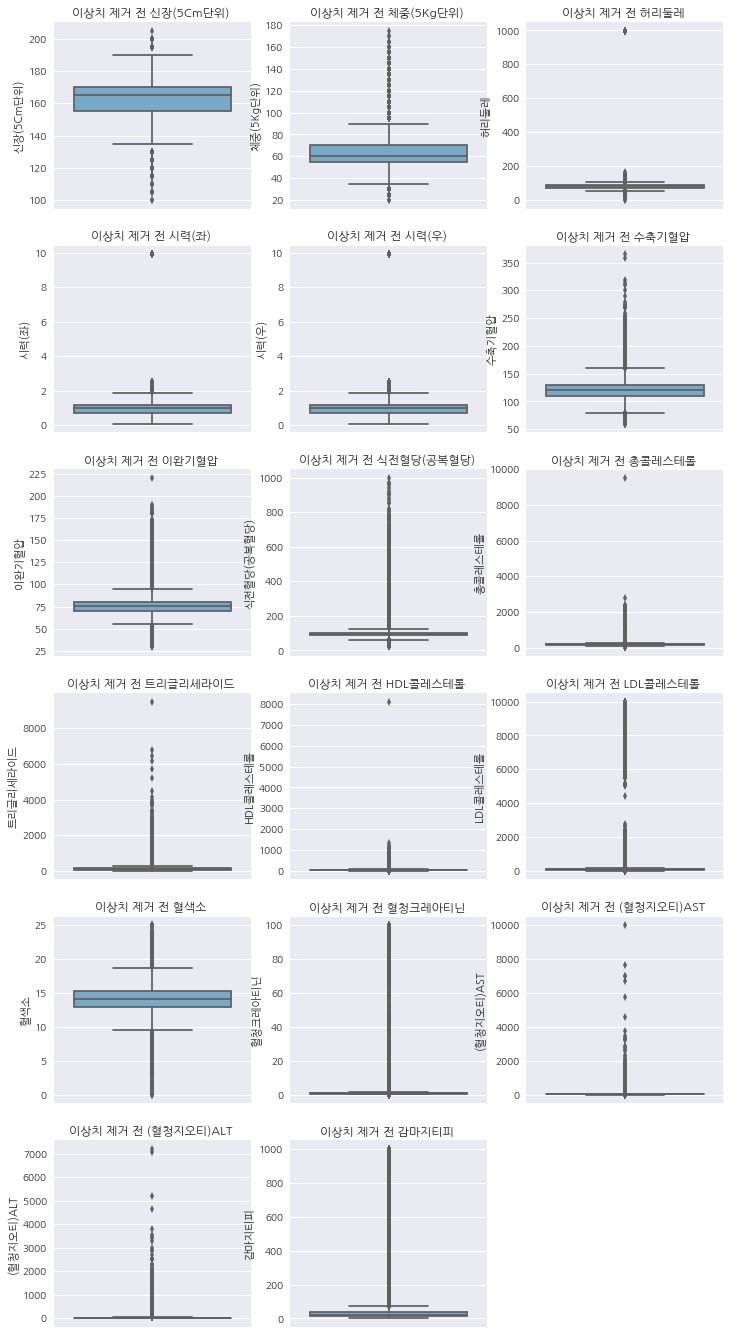

In [88]:
numberic_features = ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레','시력(좌)', '시력(우)', 
                     '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', 
                     '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤', '혈색소', '혈청크레아티닌',
                       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

def Plot(df,numberic_features ):
    sns.set(font_scale=1.0)
    fig = plt.figure(figsize=(12,24))

    for i, feature in enumerate(numberic_features):

        # 한글깨짐 윈도우(window)
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
            # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = fig.add_subplot(6,3,i+1)
        ax = sns.boxplot(x=df[feature], orient = "v", data = df, palette="Blues")    
        ax.set_title(f'이상치 제거 전 {feature} ')
        
    plt.savefig(f"./img/visual/1700_outlier_before.png", dpi=100, bbox_inches='tight')
#     plt.tight_layout()
#     plt.colse()
#     plt.show()
    
Plot(df,numberic_features )

In [ ]:
# 개별 boxplot 처리
# for feature in numberic_features:
#     sns.set(font_scale=1.0)
#     plt.figure(figsize=(6,4))
#     # 윈도우(window) 한글처리
#     font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#     mpl.rc('font', family=font_name) # ahronbd.ttf
#     sns.boxplot(x=df[feature], orient = "v", data = df)    
#     plt.title(f'이상치 제거 전 {feature} BOXPlot_1700 ')
#     plt.savefig(f"./img/visual/1700_{feature}_outlier_before.png")
#     plt.show()

#아웃라이어 전체 박스플롯(잘림 있음)
# def outlier_plot(df=None):
#     plt.style.use('ggplot') # Using ggplot2 style visuals 
#     f, ax = plt.subplots(figsize=(15, 15))
#     ax.set_facecolor('#fafafa')
#     ax.set(xlim=(-.05, 200))
#     ax = sns.boxplot(data = df, orient = 'h', palette = 'Set2')
#     plt.savefig('./img/outlier.png')
#     plt.tight_layout()
# #         plt.close(f)
# outlier_plot(old_df)    
# outlier_plot(df)

### 데이터 전처리 수치형 features(이상치 제거)

#### oulier throshold

In [90]:
# 최대, 최소 범위의 weight 조정
numberic_features_dict = {'신장(5Cm단위)' : (5, -60) ,   # 25 ~ 245
                           '체중(5Kg단위)' :(10, 115),   # 20 ~ 220
                           '허리둘레' : (11, 79),        # 10 ~ 230
                           '시력(좌)' : (4, 1.4),        # 0.01 ~ 3.2 # 0.1이하
                           '시력(우)' : (4, 1.4),        # 0.01 ~ 3.2 # 0.1이하
                           '수축기혈압' : (20, 300),     # 10 ~ 530
                           '이완기혈압' : (20, 140),     # 10 ~ 280
                           '식전혈당(공복혈당)' : (70, 1035),  # 2 ~ 1223 
                           '총콜레스테롤' : (15, 571),       # 5 ~ 953
                           '트리글리세라이드' : (15, 1228),  # 26 ~ 1433
                           'HDL콜레스테롤' : (50, 914),      # 9 ~ 1014
                           'LDL콜레스테롤' : (20, 795),      # 5 ~ 1014
                           '혈색소' : (10, 10.01),           #  0.01 ~ 38.3
                           '혈청크레아티닌' : (20, 5.301),   # 0.01 ~ 7.0 
                           '(혈청지오티)AST' : (100, 881.1), # 0.1 ~ 928
                           '(혈청지오티)ALT' : (70, 965.1), # 0.1 ~ 1079
                           '감마지티피' : (20, 465.1)        # 0.1 ~ 519
                        }

# 이상치 index찾기  # 사기데이터가 true것에 대하여 (매우적다 500/280000)
def get_outlier_index(df = None, series=None, weight_tup=None):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
#     fraud = df[df['Class']==1][column] # 사기데이터
    print(f'\nseries.name : {series.name}   weight : {weight_tup}')
    weight, lower_adj=weight_tup
    
    quantile_25 = np.percentile(series.values, 25)
    print(f'quantile_25 : {quantile_25}')
    quantile_75 = np.percentile(series.values, 75)
    print(f'quantile_75 : {quantile_75}')
    # IQR을 구하고, IQR에 weight를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    print(f'iqr : {iqr}')
    iqr_weight = iqr * weight
    print(f'iqr_weight : {iqr_weight}')
    
    # lower 조정계수 반영
    lowest_val = quantile_25 - iqr_weight + lower_adj
    print(f'lowest_val : {lowest_val}')
    
    highest_val = quantile_75 + iqr_weight
    print(f'highest_val : {highest_val}')
        
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = df[(series < lowest_val) | (series > highest_val)].index
    print(f'outlier_index length : {len(outlier_index)}\n')
    return outlier_index 

for feature, weight_tup in numberic_features_dict.items(): 
    get_outlier_index(df=df, series=df[feature], weight_tup=weight_tup)


series.name : 신장(5Cm단위)   weight : (5, -60)
quantile_25 : 155.0
quantile_75 : 170.0
iqr : 15.0
iqr_weight : 75.0
lowest_val : 20.0
highest_val : 245.0
outlier_index length : 0


series.name : 체중(5Kg단위)   weight : (10, 115)
quantile_25 : 55.0
quantile_75 : 70.0
iqr : 15.0
iqr_weight : 150.0
lowest_val : 20.0
highest_val : 220.0
outlier_index length : 0


series.name : 허리둘레   weight : (11, 79)
quantile_25 : 74.0
quantile_75 : 87.0
iqr : 13.0
iqr_weight : 143.0
lowest_val : 10.0
highest_val : 230.0
outlier_index length : 214


series.name : 시력(좌)   weight : (4, 1.4)
quantile_25 : 0.7
quantile_75 : 1.2
iqr : 0.5
iqr_weight : 2.0
lowest_val : 0.09999999999999987
highest_val : 3.2
outlier_index length : 30040


series.name : 시력(우)   weight : (4, 1.4)
quantile_25 : 0.7
quantile_75 : 1.2
iqr : 0.5
iqr_weight : 2.0
lowest_val : 0.09999999999999987
highest_val : 3.2
outlier_index length : 29511


series.name : 수축기혈압   weight : (20, 300)
quantile_25 : 110.0
quantile_75 : 130.0
iqr : 20.0
iqr_wei

In [ ]:
#### outlier remove

In [91]:
def remove_outlier(df):
    outlier_drop_indexs=[]
    for feature, weight_tup in numberic_features_dict.items(): 
        outlier_index = get_outlier_index(df=df, series=df[feature], weight_tup=weight_tup)
        if (outlier_index.values.tolist() != []):
            outlier_drop_indexs.extend(outlier_index.values.tolist())
    print(f'len(outlier_drop_indexs) : {len(outlier_drop_indexs)}\n')
    df.drop(outlier_drop_indexs, axis=0, inplace=True)
    return df

df = remove_outlier(df)
df.info()


series.name : 신장(5Cm단위)   weight : (5, -60)
quantile_25 : 155.0
quantile_75 : 170.0
iqr : 15.0
iqr_weight : 75.0
lowest_val : 20.0
highest_val : 245.0
outlier_index length : 0


series.name : 체중(5Kg단위)   weight : (10, 115)
quantile_25 : 55.0
quantile_75 : 70.0
iqr : 15.0
iqr_weight : 150.0
lowest_val : 20.0
highest_val : 220.0
outlier_index length : 0


series.name : 허리둘레   weight : (11, 79)
quantile_25 : 74.0
quantile_75 : 87.0
iqr : 13.0
iqr_weight : 143.0
lowest_val : 10.0
highest_val : 230.0
outlier_index length : 214


series.name : 시력(좌)   weight : (4, 1.4)
quantile_25 : 0.7
quantile_75 : 1.2
iqr : 0.5
iqr_weight : 2.0
lowest_val : 0.09999999999999987
highest_val : 3.2
outlier_index length : 30040


series.name : 시력(우)   weight : (4, 1.4)
quantile_25 : 0.7
quantile_75 : 1.2
iqr : 0.5
iqr_weight : 2.0
lowest_val : 0.09999999999999987
highest_val : 3.2
outlier_index length : 29511


series.name : 수축기혈압   weight : (20, 300)
quantile_25 : 110.0
quantile_75 : 130.0
iqr : 20.0
iqr_wei

#### 수치형 features 이상치 제거 후 boxplot 이상치 확인 

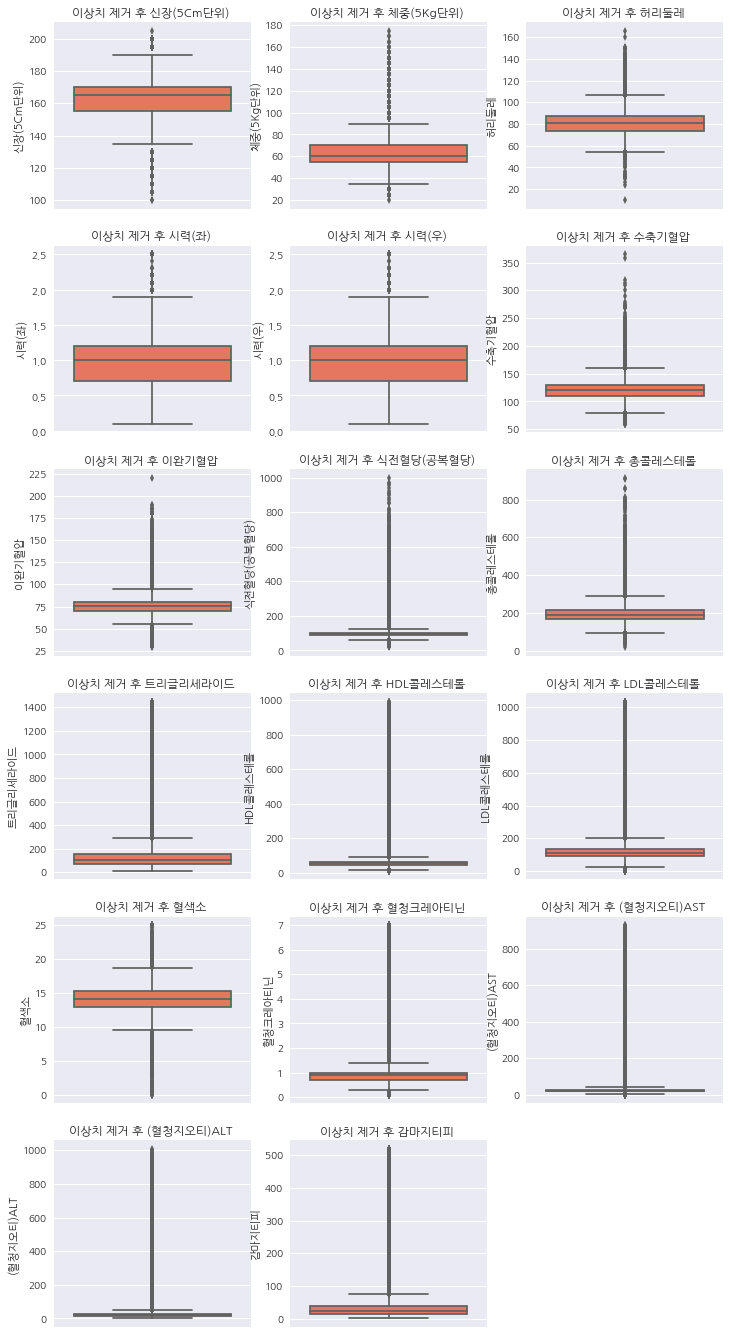

In [92]:
numberic_features = ['신장(5Cm단위)', '체중(5Kg단위)', '허리둘레','시력(좌)', '시력(우)', 
                     '수축기혈압', '이완기혈압', '식전혈당(공복혈당)','총콜레스테롤', 
                     '트리글리세라이드', 'HDL콜레스테롤','LDL콜레스테롤', '혈색소', '혈청크레아티닌',
                       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피']

def Plot(df,numberic_features ):
    sns.set(font_scale=1.0)
    fig = plt.figure(figsize=(12,24))

    for i, feature in enumerate(numberic_features):

        # 한글깨짐 윈도우(window)
#         font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() # 폴더구분자 python / 임
#         mpl.rc('font', family=font_name) # ahronbd.ttf
            # 한글깨짐 리눅스
        mpl.rcParams['font.family'] = 'NanumGothic'
        mpl.rc('axes', unicode_minus=False)

        ax = fig.add_subplot(6,3,i+1)
        ax = sns.boxplot(x=df[feature], orient = "v", data = df, palette="Reds")    
        ax.set_title(f'이상치 제거 후 {feature} ')
        
    plt.savefig(f"./img/visual/1700_outlier_after.png", dpi=100, bbox_inches='tight')
#     plt.tight_layout()
#     plt.colse()
#     plt.show()
    
Plot(df,numberic_features )

#### 이상치 제거 전후 BOXPlot 비교

In [93]:
display(HTML("<table><tr><td><img src='./img/visual/1700_outlier_before.png'></td><td><img src='./img/visual/1700_outlier_after.png'></td></tr></table>"))

,


### 이상치 제거 전후 당뇨통계 변동확인 6.86% -> 6.68%

In [94]:
tmp_lst=df['target'].value_counts().values
print(f'정상(target) {np.round((tmp_lst[0]/tmp_lst.sum())*100, 2)}%')
print(f'당뇨(target) {np.round((tmp_lst[1]/tmp_lst.sum())*100, 2)}%')

정상(target) 93.32%
당뇨(target) 6.68%


#### duplicate row find remove

In [96]:
duplicateDFRow = df[df.duplicated()]
duplicateDFRow

,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,target
554827,2009,1,6,48,175.0,70.0,88.0,1.2,1.0,1.0,...,12.3,1.0,1.2,14.0,12.0,18.0,1.0,1.0,0.0,0
8927944,2014,2,10,41,150.0,55.0,73.0,1.0,0.8,1.0,...,13.0,1.0,0.6,21.0,16.0,20.0,1.0,1.0,0.0,0
11198490,2018,1,14,48,165.0,75.0,87.0,0.7,0.7,1.0,...,14.8,1.0,1.0,17.0,10.0,72.0,3.0,1.0,0.0,1
11480419,2018,2,9,41,165.0,65.0,84.8,1.2,1.2,1.0,...,12.8,1.0,0.6,21.0,15.0,14.0,1.0,1.0,1.0,0
11665641,2018,2,14,27,150.0,55.0,83.0,0.8,0.7,1.0,...,14.1,1.0,0.8,37.0,28.0,33.0,1.0,1.0,0.0,0
11727488,2018,2,9,26,145.0,40.0,70.0,1.0,1.0,1.0,...,11.2,1.0,0.7,23.0,14.0,14.0,2.0,1.0,0.0,0
11759644,2018,2,13,11,145.0,85.0,110.1,0.3,0.7,1.0,...,14.4,1.0,0.8,27.0,27.0,11.0,1.0,0.0,0.0,0
11889594,2018,2,12,28,160.0,50.0,74.6,0.9,1.0,1.0,...,14.3,1.0,0.7,31.0,32.0,21.0,1.0,1.0,0.0,0
11896323,2018,1,13,41,170.0,70.0,81.0,0.5,0.5,1.0,...,15.5,1.0,0.9,17.0,18.0,20.0,3.0,0.0,0.0,0
11917447,2018,1,7,11,185.0,90.0,96.0,1.2,1.0,1.0,...,15.0,1.0,1.1,31.0,49.0,31.0,1.0,1.0,1.0,0


In [97]:
df.drop_duplicates(keep=False,inplace=True) 
duplicateDFRow = df[df.duplicated()]
duplicateDFRow

,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,target


### info 확인

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9106191 entries, 2 to 15000000
Data columns (total 28 columns):
기준년도           int64
성별코드           int64
연령대코드(5세단위)    int64
시도코드           int64
신장(5Cm단위)      float64
체중(5Kg단위)      float64
허리둘레           float64
시력(좌)          float64
시력(우)          float64
청력(좌)          float64
청력(우)          float64
수축기혈압          float64
이완기혈압          float64
식전혈당(공복혈당)     float64
총콜레스테롤         float64
트리글리세라이드       float64
HDL콜레스테롤       float64
LDL콜레스테롤       float64
혈색소            float64
요단백            float64
혈청크레아티닌        float64
(혈청지오티)AST     float64
(혈청지오티)ALT     float64
감마지티피          float64
흡연상태           float64
음주여부           float64
구강검진수검여부       float64
target         int64
dtypes: float64(23), int64(5)
memory usage: 2.0 GB


### random feature 'target' remove 

In [99]:
df.drop('target', axis=1, inplace=True)

In [ ]:
df.to_csv('./data/NHIS_total_model.csv', sep=',', encoding='utf-8', index=False)